# ex4 practical exercises for [Example Sheet 4](https://www.cl.cam.ac.uk/teaching/current/DataSci/ex/ex4.pdf).

The example sheet asks you to implement the skeleton functions given below.
To test your answers on [Moodle](https://www.cl.cam.ac.uk/teaching/current/DataSci/redirect/ex4moodle.html),
please upload either a Jupyter notebook called `ex4.ipynb` or a plain Python file called `ex4.py`.

**fit_mrrw.** We have a dataset $x_0,x_1,\dots,x_n$, which we wish to model as
$$
X_i = \mu + \lambda(X_{i-1}-\mu) + N(0,\sigma^2).
$$
Find maximum likelihood estimates for the three parameters.

<img src="res/mrrw.svg" style="height:6em">

```
def fit_mrrw(x):
    # Input: x a numpy vector
    # TODO: find maximum likelihood estimates
    return (μ, λ, σ)
```

**fit_climate0, fit_climate1, test_climate0.** Consider a dataset of average November temperatures in Cambridge, $(t_i,\text{temp}_i)$, giving the year and the temperature. The records are in increasing order of year and there are no gaps. Here are two possible models:
\begin{align*}
&\text{Model }H_0:\qquad \text{Temp}_i = \alpha+\gamma(t_i-2000)+N(0,\sigma^2)\\
&\text{Model }H_1:\qquad \text{Temp}_i = \alpha+\gamma(t_i-2000)+\lambda\text{Temp}_{i-1}+N(0,\sigma^2)
\end{align*}
Fit the two models, and perform a hypothesis test of whether $H_0$ is adequate.
```
def fit_climateX(temp, t):
    # Input: temp and t are numpy vectors
    # TODO: find maximum likelihood estimates
    return (α,γ,σ) for H0, return (α,γ,λ,σ) for H1

def test_climate0(temp, t):
    # TODO: test, using parametric resampling, and λhat as the test statistic
    # About 20,000 samples should be sufficient to pass the tester
    return pvalue
```

**graphrw_stationary.** Consider a random walk on the vertices of an undirected graph, as follows: each timestep we take one of the edges chosen at random, each edge from our current vertex equally likely. Find the stationary distribution.

<img src="res/graphrw.svg" style="height:6em">

```
def graphrw_stationary(adj):
    # Input: adj is a numpy matrix, specifying the adjacency matrix
    # TODO: Find the stationary distribution π, as a numpy vector
    return π
```

**hmm_predict.** Consider a moving object with noisy location readings. Let $X_n$ be the location at timestep $n\geq0$, $X_n\in\{0,1,\dots,\texttt{MAX_STATE}\}$, and $Y_n$ the reading. The exact simulator for this system can be found on the [example sheet](https://www.cl.cam.ac.uk/teaching/current/DataSci/ex/ex4.pdf). We wish to find the distribution of $X_n$ given $y_0,\dots,y_n$. The 
distribution of $X_0$ is also given, as $\texttt{pr0}=[\operatorname{Pr}_{X_0}(0),\dots,\operatorname{Pr}_{X_0}(\texttt{MAX_STATE})]$.

<img src="res/hmm.svg" style="height:11em">

```
def hmm_predict(pr0, y):
    # Input: pr0, a numpy vector with the distribution of X0
    #        y, a numpy vector with the sequence of noisy readings
    #        (Note than MAX_STATE = len(pr0) - 1.)
    # TODO: find the distribution of (Xn | y0,...,yn)
    return this dist. as a numpy vector
```

# TEST
_The Moodle checker will look for a markdown cell with the contents `# TEST`, and ignore everything beneath it. Put your working code above this cell, and put any experiments and tests below._

In [20]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [ ]:
x = np.array([10.64,  9.43,  9.19, 10.03, 11.27, 10.71,  9.54, 10.45,  8.36,
    7.08, 10.23, 10.19, 10.12,  8.72, 10.12,  8.19,  9.45, 11.32,
    10.89, 10.76])
fit_mrrw(x)

In [ ]:
url = 'https://www.cl.cam.ac.uk/teaching/current/DataSci/data/climate_202510.csv'
climate = pandas.read_csv(url)
cambridge11 = climate.loc[(climate.station=='Cambridge') & (climate.mm==11)].sort_values('yyyy')

print(fit_climate0(cambridge11.temp.values, cambridge11.yyyy.values))
print(fit_climate1(cambridge11.temp.values, cambridge11.yyyy.values))
print(test_climate0(cambridge11.temp.values, cambridge11.yyyy.values))

In [ ]:
edges = [(0,1), (1,2), (1,3), (2,3)]
adj = np.zeros((4,4))
for i,j in edges:
    adj[i,j] = 1
    adj[j,i] = 1
graphrw_stationary(adj)

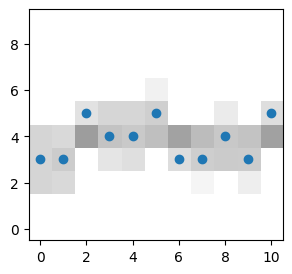

In [27]:
pr0 = np.full(10, 1/10)
y = [3,3,5,4,4,5,3,3,4,3,5,4]
prx = [hmm_predict(pr0, y[:i]) for i in range(1, len(y))]

fig,ax = plt.subplots(figsize=(4,3))
ax.scatter(range(len(y)), y)
im = ax.imshow(np.array(prx).transpose(), cmap='binary')
im.set_clim(0,2)
ax.invert_yaxis()
plt.show()